# GitHub_example
[GitHubのREADMEファイル](https://github.com/ResidentMario/missingno)で紹介されている例を写経します.



## quickstart
このクイックスタートでは、[NYPD Motor Vehicle Collisions Dataset](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95) データセットのサンプルを使用します。

In [1]:
import pandas as pd
collisions = pd.read_csv("https://raw.githubusercontent.com/ResidentMario/missingno-data/master/nyc_collision_factors.csv")

### ```matrix```
```msno.matrix``` 無効マトリックスはデータ密度の高い表示であり、データ補完のパターンを視覚的にすばやく選択できます。

<Axes: >

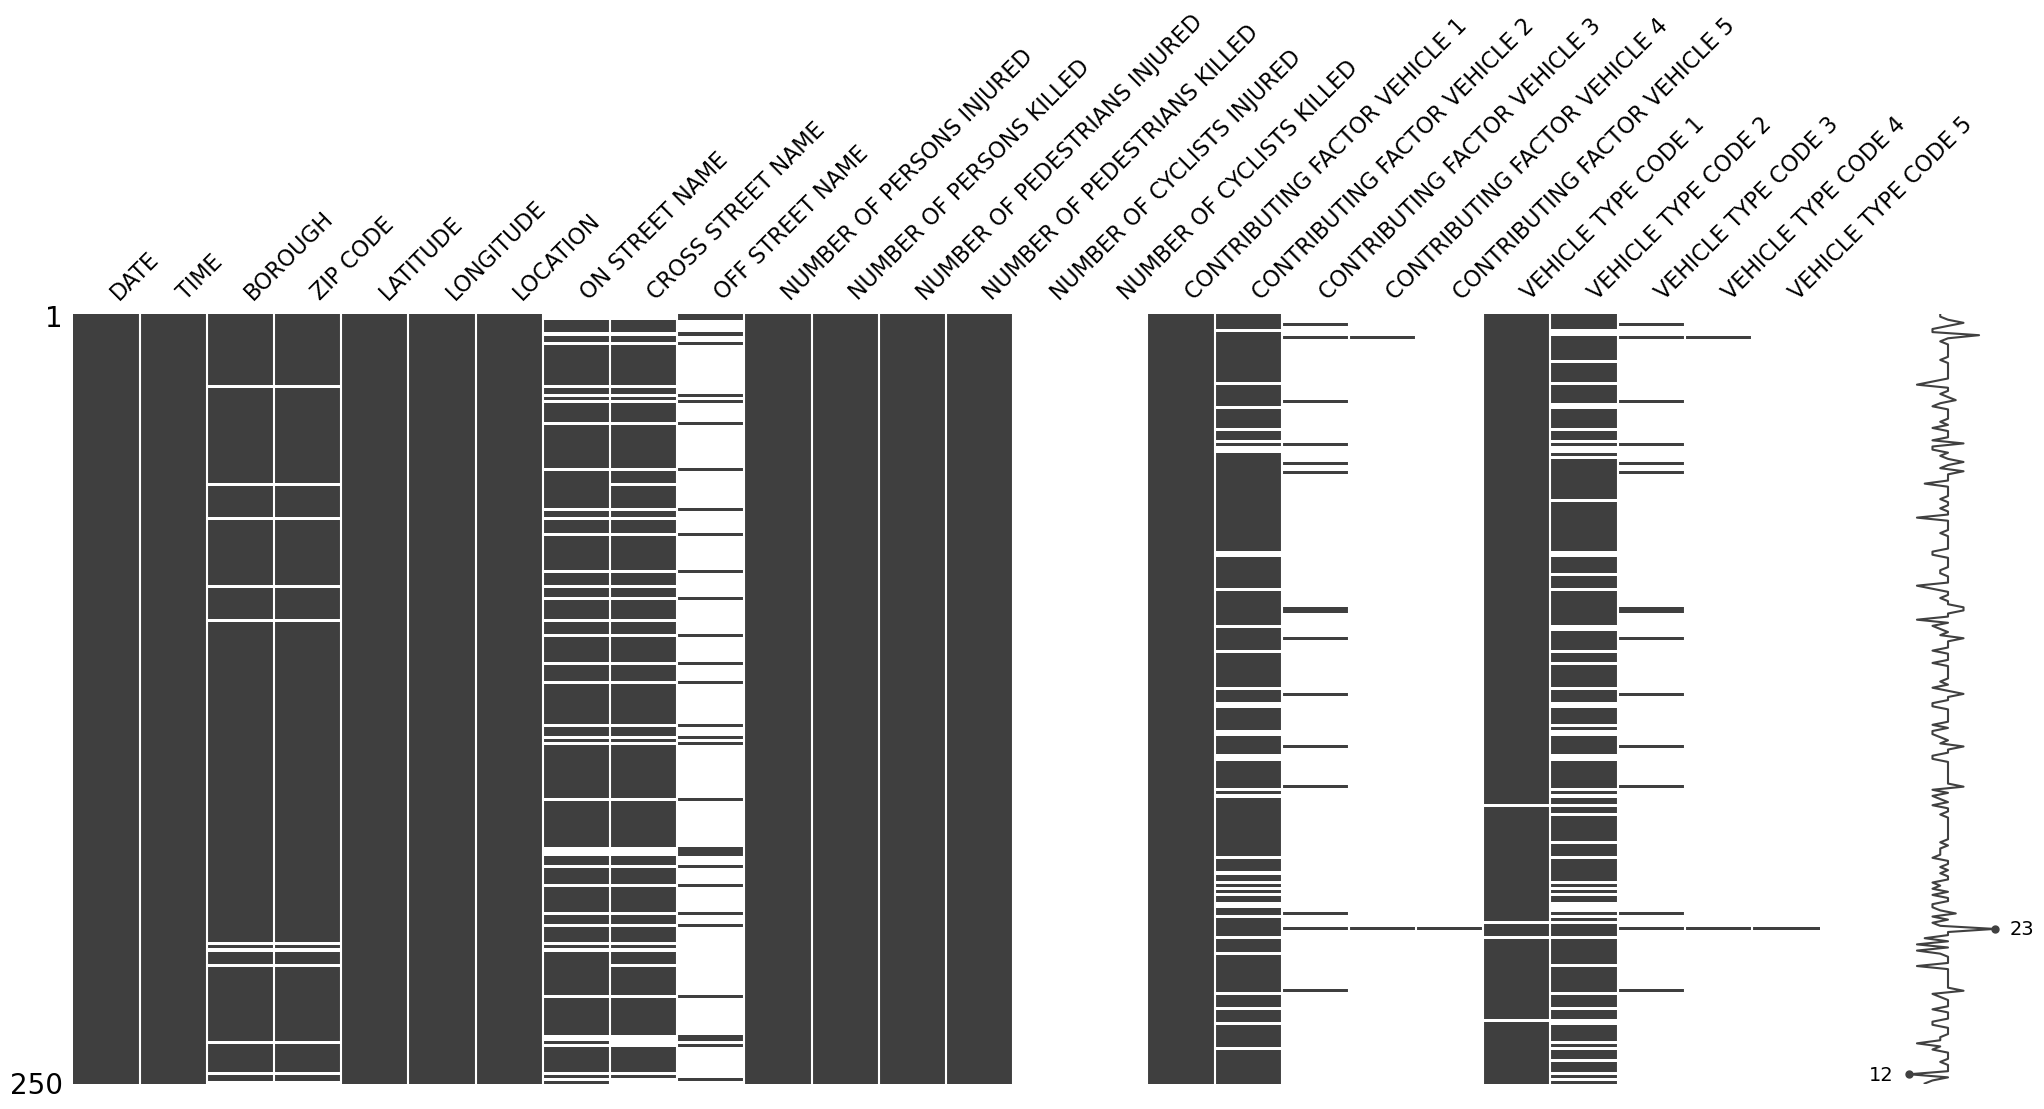

In [2]:
import missingno as msno
%matplotlib inline
msno.matrix(collisions.sample(250))

一見したところ、日付、時刻、負傷者の分布、最初の車両の寄与率は完全に入力されているように見えますが、地理情報はほぼ完全であるように見えますが、斑点が多くあります。

右側のスパークラインは、データの完全性の一般的な形状を要約し、データセット内の最大および最小の無効を持つ行を示しています。

この視覚化は、最大 50 個のラベル付き変数を快適に収容できます。 その範囲を超えるとラベルが重なったり読めなくなったりし、デフォルトでは大きなディスプレイではラベルが省略されます。

時系列データを操作している場合は、 ```freq``` キーワード パラメータを使用して [周期性を指定](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) できます。

In [3]:
#import numpy as np
#null_pattern = (np.random.random(1000).reshape((50, 20)) > 0.5).astype(bool)
#null_pattern = pd.DataFrame(null_pattern).replace({False: None})
#msno.matrix(null_pattern.set_index(pd.period_range('1/1/2011', '2/1/2015', freq='M')) , freq='BQ')

### ```bar```
```msno.bar``` は、列ごとに無効を単純に視覚化したものです。

<Axes: >

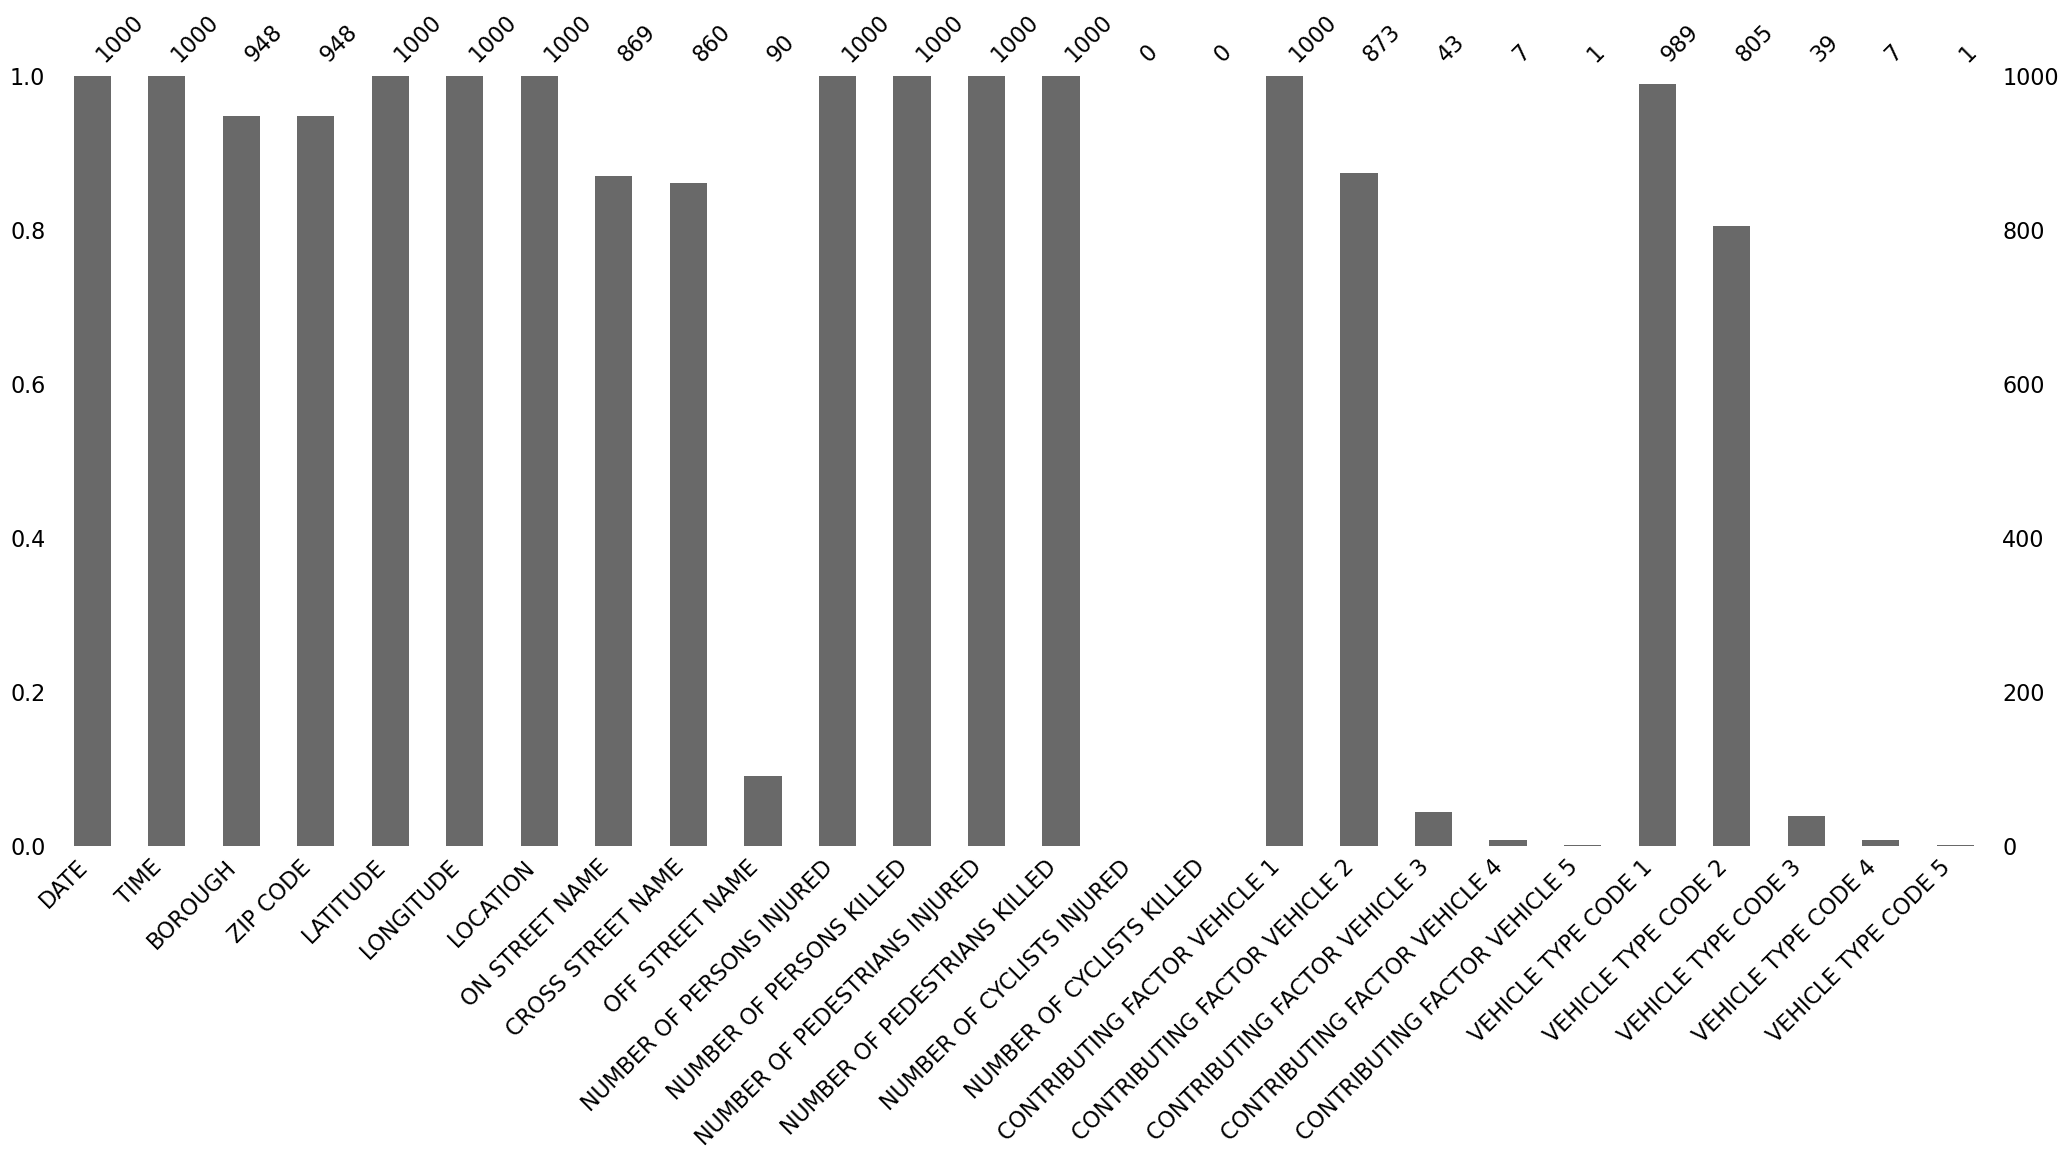

In [4]:
msno.bar(collisions.sample(1000))

``log = True`` を指定すると、対数スケールに切り替えることができます。 ```bar``` は ```matrix``` と同じ情報を提供しますが、より単純な形式です。

### ```heatmap```
```missingno``` 相関ヒートマップは無効相関を測定します。つまり、ある変数の有無が別の変数の存在にどの程度強く影響するかを測定します:

````
```
エラーが出る
```
````

In [5]:
#msno.heatmap(collisions)

この例では、``OFF Street NAME`` 変数を使用してファイルされたレポートには完全な地理データが含まれる可能性が低いように見えます。

帰無相関の範囲は、```-1``` (一方の変数が出現しても、他方は絶対に出現しない) から ```0``` (出現する変数または出現しない変数は互いに影響を与えない)、そして ```1` までです。 `` (1 つの変数が出現すると、もう 1 つの変数も確実に出現します)。

使用される正確なアルゴリズムは次のとおりです。

In [6]:
import numpy as np

# df is a pandas.DataFrame instance
df = collisions.iloc[:, [i for i, n in enumerate(np.var(collisions.isnull(), axis='rows')) if n > 0]]
corr_mat = df.isnull().corr()

常に満杯または常に空の変数には意味のある相関関係がないため、視覚化から暗黙的に削除されます。この場合、たとえば、完全に埋まっている日時列と負傷者数列は含まれません。

```<1``` または ```>-1``` とマークされたエントリは、ほぼ完全に負または正に近い相関関係を持っていますが、まだ完全に一致しているわけではありません。 これは、データセット内の少数のレコードが間違っていることを示しています。 たとえば、このデータセットでは、```VEHICLE CODE TYPE 3``` と ```CONTRIBUTING FACTOR VEHICLE 3``` の間の相関関係は ```<1``` であり、予想に反して、 どちらか一方を持ち、両方を持たないレコードがいくつかあります。 このような場合には特別な注意が必要です。

ヒートマップは、変数ペア間のデータの完全性関係を特定するのに最適ですが、大規模な関係になると説明力が制限され、非常に大規模なデータセットは特にサポートされません。

### ```dendrogram```
デンドログラムを使用すると、変数の完了をより完全に相関させることができ、相関ヒートマップで表示されるペアごとの傾向よりも深い傾向を明らかにすることができます。:

<Axes: >

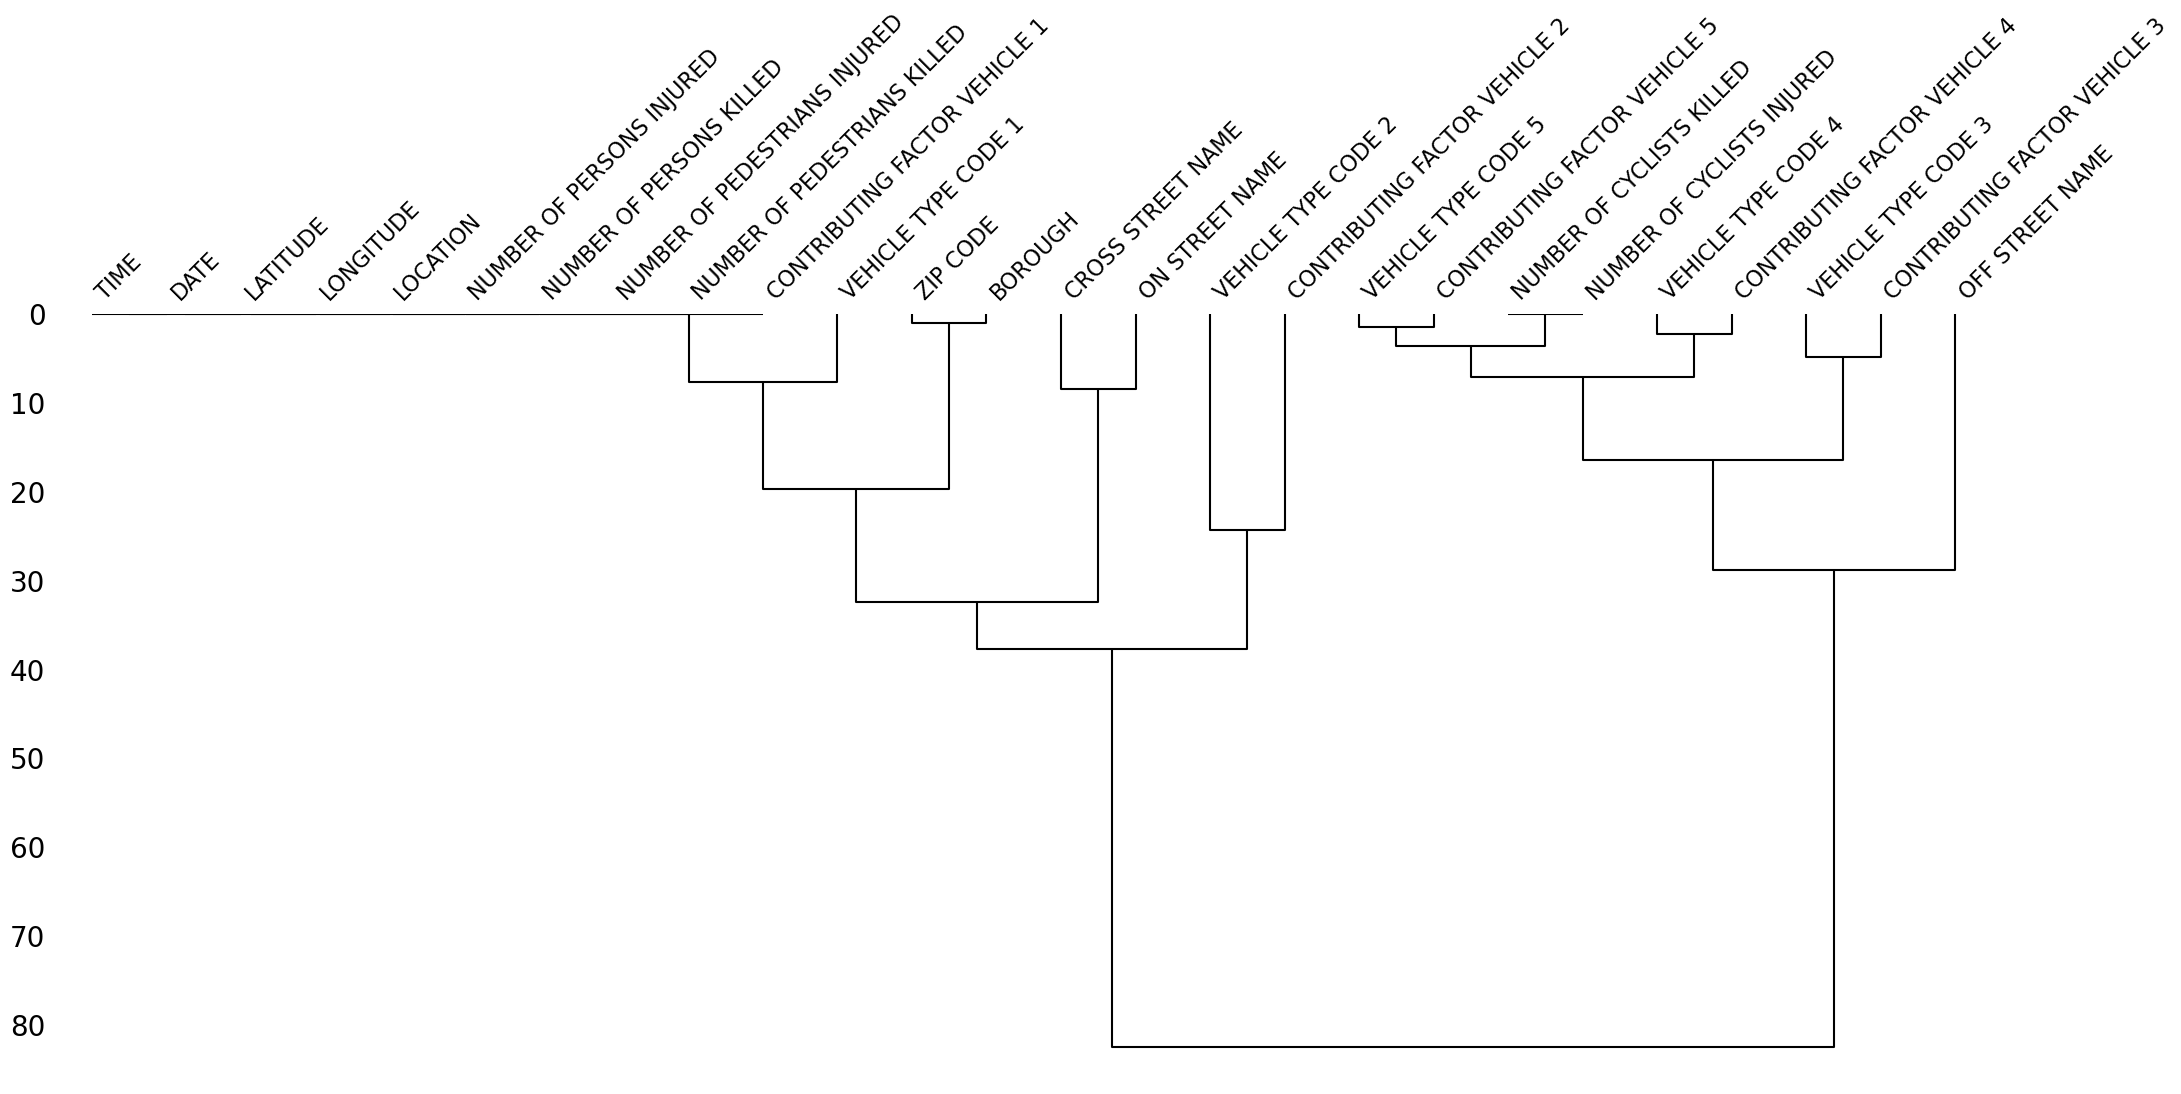

In [7]:
msno.dendrogram(collisions)

樹形図は、[階層クラスタリング アルゴリズム](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html) (```scipy```` の提供) を使用して、無効相関 (バイナリ距離で測定) によって変数を相互にビン分けします。 ツリーの各ステップで、どの組み合わせが残りのクラスターの距離を最小化するかに基づいて変数が分割されます。 変数のセットが単調であればあるほど、それらの合計距離はゼロに近づき、平均距離 (y 軸) はゼロに近づきます。

使用される正確なアルゴリズムは次のとおりです。

````
```
エラーが出る
```
````

In [8]:
#from scipy.cluster import hierarchy
#import numpy as np

# df is a pandas.DataFrame instance
#x = np.transpose(collisions.isnull().astype(int).values)
#z = hierarchy.linkage(x, method)

このグラフを解釈するには、トップダウンの視点から読んでください。 ゼロの距離でリンクされたクラスター リーフは、互いの存在を完全に予測します。一方の変数が満たされているときに別の変数が常に空である可能性や、常に両方が満たされている、または両方とも空である可能性などがあります。 この特定の例では、樹状図は必要な変数を結合し、したがってすべてのレコードに存在します。

ゼロに近いが分裂しないクラスターの葉は、互いに非常によく予測しますが、それでも不完全です。 データセットの独自の解釈が、これらの列が実際には相互に無効に一致している、または一致するはずであるという場合 (たとえば、「CONTRIBUTING FACTOR VEHICLE 2」と「VEHICLE TYPE CODE 2」のように一致するはずです) 、クラスター リーフの高さによって、レコードが「不一致」または誤ってファイルされる頻度、つまり、その気になれば、入力または削除する必要がある値の数が絶対的にわかります。

```matrix``` と同様に、この構成では最大 50 個のラベル付き列のみが快適に表示されます。 ただし、```dendrogram``` は、単純に水平構成に切り替えることで、非常に大きなデータセットをよりエレガントに処理します。

### configuration
プロットのさらに高度な設定の詳細については、このリポジトリの ``CONFIGURATION.md`` ファイルを参照してください。

### contributing
機能やバグレポートについての考えについては、[問題点](https://github.com/ResidentMario/missingno/issues) を参照してください。 このライブラリに貢献することに興味がある場合は、このリポジトリの ``CONTRIBUTING.md`` ファイルでその詳細を参照してください。 その場合、missingno は現在メンテナンス状態にあるため、バグ修正は歓迎ですが、新しい主要なライブラリ機能をレビューしたり実装したりする可能性は低いことに留意してください。